In [1]:
import pandas as pd
import matplotlib.pyplot as plt


[0, 100]
0 DSP % -0.000x+10.723 R2=1.00000
0 FF % 0.017x+0.648 R2=0.99999
0 LUT % 0.013x+2.856 R2=0.98710
0 Latency (cycles) 1.000*x^2+35.000x+170.000 R2=1.00000
0 Timing (min) 0.000*x^2+0.007x+0.854 R2=0.99985
0 DSP % -0.000x+10.723 R2=1.00000
0 FF % 0.017x+0.648 R2=0.99999
0 LUT % 0.013x+2.856 R2=0.98710
[0, 100]
2 DSP % -0.000x+10.723 R2=1.00000
2 FF % 0.348x+-6.590 R2=0.98804
2 LUT % 0.243x+2.224 R2=0.99997
2 Latency (cycles) 10.000x+19.000 R2=1.00000
2 Timing (min) 0.727*exp(0.023x) R2=1.00000
2 DSP % -0.000x+10.723 R2=1.00000
2 FF % 0.002*x^2+0.090x+0.476 R2=1.00000
2 LUT % 0.000*x^2+0.235x+2.451 R2=1.00000


/home/denis/UBUNTU_TEST/HitWarrior/zReportReader/infoPlotter.py:213: OptimizeWarning: Covariance of the parameters could not be estimated
  pars, cov = curve_fit(f, track_sizes, d, ff.p0)
/home/denis/UBUNTU_TEST/HitWarrior/zReportReader/infoPlotter.py:213: OptimizeWarning: Covariance of the parameters could not be estimated
  pars, cov = curve_fit(f, track_sizes, d, ff.p0)


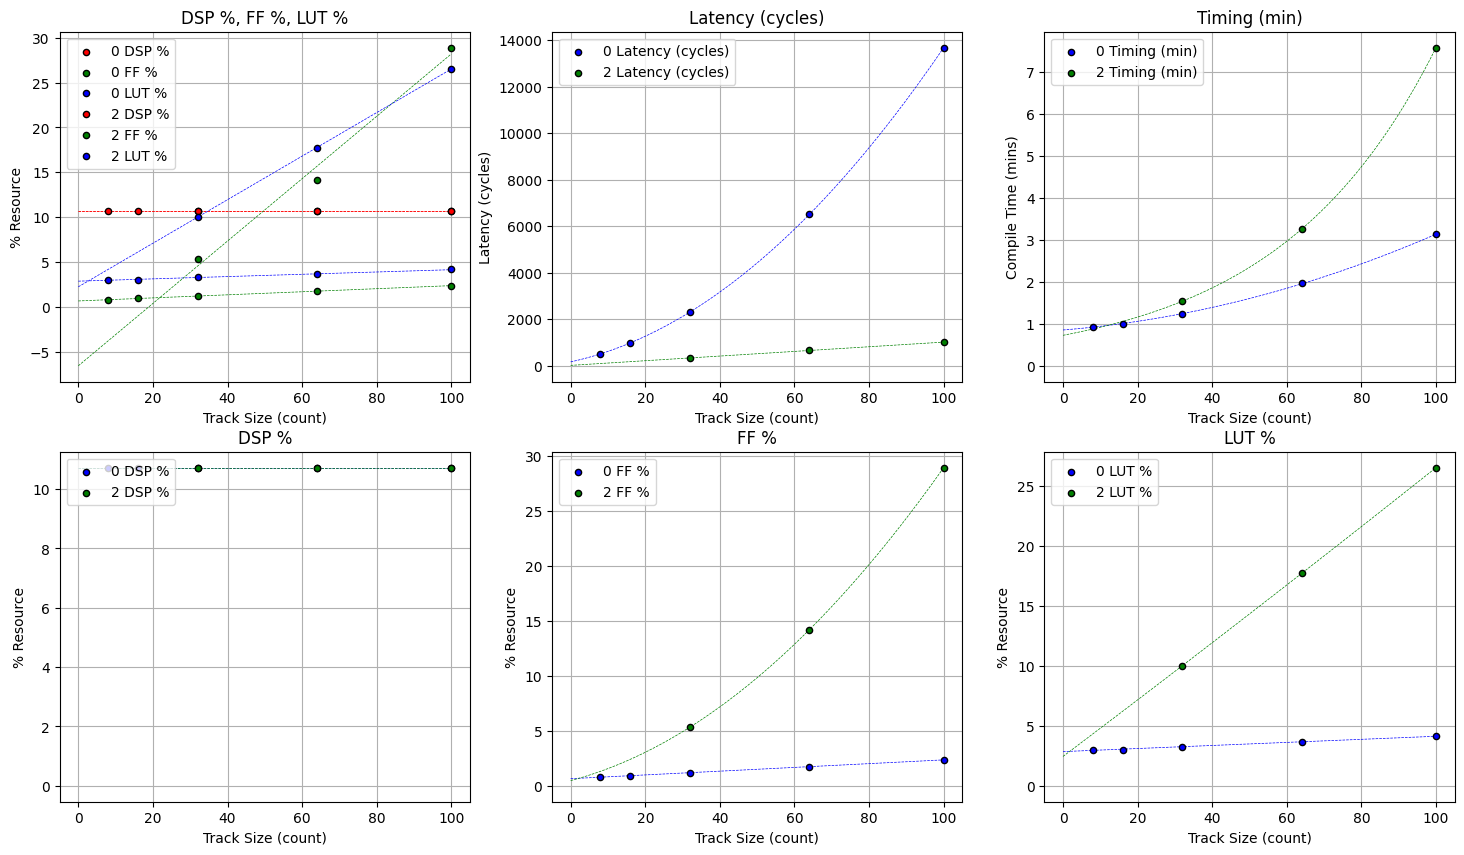

In [4]:
from infoPlotter import TrackVSPlot

fig, ax = plt.subplots(2,3, figsize=(18,10))
axRes = ax[0,0]
axLat = ax[0,1]
axComp = ax[0,2]
axDSP = ax[1,0]
axFF = ax[1,1]
axLUT = ax[1,2]


resYLabel = (lambda x : x.ax.set_ylabel("% Resource"))

TrackVSPlot("./data/July10_1_data/", modules=["runner"], ID=0, default_color="blue")\
  .defaults(axRes, axLat, axComp, axDSP, axFF, axLUT)\
  .plot(xlims=[0, 100])

# TrackVSPlot("./data/July11_1_data/", modules=["runner"], ID=1, default_color="orange")\
#   .defaults(axRes, axLat, axComp, axDSP, axFF, axLUT)\
#   .setup("latency", fits=["linear"])\
#   .setup("compile", ylims=[-5, 50], fits=["exp"])\
#   .setup("FF", fits=["quad"])\
#   .setup("LUT", fits=["quad"])\
#   .plot(xlims=[0, 100])

# .setup("latency", ylims=[-5, 200], fits=["linear"])

TrackVSPlot("./data/Aug5_1_data/", modules=["HitWarrior"], ID=2, default_color="green")\
  .defaults(axRes, axLat, axComp, axDSP, axFF, axLUT)\
  .setup("latency", fits=["linear"])\
  .setup("compile", fits=["exp"])\
  .setup("FF", fits=["quad"])\
  .setup("LUT", fits=["quad"])\
  .plot(xlims=[0, 100])


TrackVSPlot("./data/Aug5_2_data/", modules=["HitWarrior"], ID=3, default_color="purple
")\
  .defaults(axRes, axLat, axComp, axDSP, axFF, axLUT)\
  .setup("latency", fits=["linear"])\
  .setup("compile", fits=["exp"])\
  .setup("FF", fits=["quad"])\
  .setup("LUT", fits=["quad"])\
  .plot(xlims=[0, 100])

# TrackVSPlot("./data/July15_1_data/", modules=["runner"], ID=1, default_color="orange")\
#   .defaults(axRes, axLat, axComp, axDSP, axFF, axLUT)\
#   .setup("latency", fits=["exp"])\
#   .setup("compile", fits=["exp"])\
#   .plot()

# TrackVSPlot("./data/July25_1_data/", modules=["runner"], ID=2, default_color="red")\
#   .defaults(axRes, axLat, axComp, axDSP, axFF, axLUT)\
#   .setup("latency", fits=["exp"])\
#   .setup("compile", fits=["exp"])\
#   .plot(xlims=[0,None])

# TrackVSPlot("./data/July15_2_data/", modules=["runner"], ID=2, default_color="orange")\
#   .defaults(axRes, axLat, axComp, axDSP, axFF, axLUT)

In [ ]:
from infoPlotter import TrackVSPlot

fig1 = plt.figure(figsize=(5,5))
axFF = plt.gca()

fig2 = plt.figure(figsize=(5,5))
axLat = plt.gca()

def resYLabel(x):
  x.ax.set_ylabel("% Resource")



TrackVSPlot("./data/July10_1_data/", modules=["runner"], ID=0, default_color="C0")\
  .setup_latency(ax=axLat, fits=['quad'])\
  .setup("FF", ax=axFF, fits=["linear"], selections=["FF %"], final_call=resYLabel)\
  .plot(xlims=[0, 100], mksize=50, linewidth=2, labels="Rolled")

TrackVSPlot("./data/July11_1_data/", modules=["runner"], ID=1, default_color="C1")\
  .setup_latency(ax=axLat, fits=["linear"])\
  .setup("FF", ax=axFF, fits=["quad"], selections=["FF %"], final_call=resYLabel)\
  .plot(xlims=[0, 100], mksize=50, linewidth=2, labels="Unrolled")

fig1.savefig("FINAL_FF_plot.png", bbox_inches="tight", dpi=300)

fig2.savefig("FINAL_Latency_plot.png", bbox_inches="tight", dpi=300)

In [ ]:


# TrackVSPlot("./data/July10_1_data/", modules=["runner"], ID=0, default_color="blue")\
#   .setup_resources(colors=["red", "blue", "green"], fits=["linear", "linear", "linear"], ax=axRes)\
#   .setup_latency(fits=["quad"], ax=axLat)\
#   .setup_compile(fits=["quad"], ax=axComp)\
#   .setup(name="DSP", fits=["linear"], final_call=resYLabel, ax=axDSP, selections=["DSP %"])\
#   .setup(name="FF", fits=["linear"], final_call=resYLabel, ax=axFF, selections=["FF %"])\
#   .setup(name="LUT", fits=["linear"], final_call=resYLabel, ax=axLUT, selections=["LUT %"])\
#   .plot(xlims=[0,100])

# # New Algorithm
# TrackVSPlot("./data/July15_1_data/", modules=["runner"], ID=1, default_color="orange")\
#   .setup_resources(colors=["C0", "C1", "C2"], fits=["linear", "linear", "linear"], ax=axRes)\
#   .setup_latency(fits=["quad"], ax=axLat)\
#   .setup_compile(fits=["quad"], ax=axComp)\
#   .setup(name="DSP", fits=["linear"], final_call=resYLabel, ax=axDSP, selections=["DSP %"])\
#   .setup(name="FF", fits=["linear"], final_call=resYLabel, ax=axFF, selections=["FF %"])\
#   .setup(name="LUT", fits=["linear"], final_call=resYLabel, ax=axLUT, selections=["LUT %"])\
#   .plot(xlims=[0,100])

# # PIPELINED
# TrackVSPlot("./data/July11_1_data/", modules=["runner"], ID=1, default_color="orange")\
#   .setup_resources(colors=["C0", "C1", "C2"], fits=["quad", "quad", "linear"], ax=axRes)\
#   .setup_latency(fits=["linear"], ax=axLat, ylims=[0,5])\
#   .setup_compile(fits=[["exp", [1, 0]]], ax=axComp)\
#   .setup(name="DSP", fits=["linear"], final_call=resYLabel, ax=axDSP, selections=["DSP %"])\
#   .setup(name="FF", fits=["quad"], final_call=resYLabel, ax=axFF, selections=["FF %"])\
#   .setup(name="LUT", fits=["quad"], final_call=resYLabel, ax=axLUT, selections=["LUT %"])\
#   .plot()

# # DATAFLOW - worst
# TrackVSPlot("./data/July12_1_data/", modules=["runner*"], ID=2, default_color="green")\
#   .setup_resources(colors=["C0", "C1", "C2"], fits=["quad", "quad", "linear"], ax=axRes)\
#   .setup_latency(fits=["linear"], ax=axLat, ylims=[0,5])\
#   .setup_compile(fits=[["exp", [1, 0]]], ax=axComp)\
#   .setup(name="DSP", fits=["linear"], final_call=resYLabel, ax=axDSP, selections=["DSP %"])\
#   .setup(name="FF", fits=["quad"], final_call=resYLabel, ax=axFF, selections=["FF %"])\
#   .setup(name="LUT", fits=["quad"], final_call=resYLabel, ax=axLUT, selections=["LUT %"])\
#   .plot()

fig.savefig("plot01.png")


# TrackVSPlot("./data/July12_2_data/", modules=["runner"], ID=3, default_color="cyan")\
#   .setup_resources(colors=["C0", "C1", "C2"], fits=["quad", "quad", "linear"], ax=axRes)\
#   .setup_latency(fits=["linear"], ax=axLat, ylims=[0,5])\
#   .setup_compile(fits=[["exp", [1, 0]]], ax=axComp)\
#   .setup(name="DSP", fits=["linear"], final_call=resYLabel, ax=axDSP, selections=["DSP %"])\
#   .setup(name="FF", fits=["quad"], final_call=resYLabel, ax=axFF, selections=["FF %"])\
#   .setup(name="LUT", fits=["quad"], final_call=resYLabel, ax=axLUT, selections=["LUT %"])\
#   .plot()